In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gsdp_df = pd.read_csv('datasets/Data-1-A-GSDP.csv')
gsdp_df['Duration'] = pd.to_numeric(gsdp_df['Duration'].str.split('-', expand = True)[0])

In [3]:
print(gsdp_df.isna().sum(axis = 0) * 100/gsdp_df['Duration'].count())

Items  Description             0.000000
Duration                       0.000000
Andhra Pradesh                 0.000000
Arunachal Pradesh             18.181818
Assam                         18.181818
Bihar                         18.181818
Chhattisgarh                   0.000000
Goa                           18.181818
Gujarat                       18.181818
Haryana                        0.000000
Himachal Pradesh              36.363636
Jammu & Kashmir               18.181818
Jharkhand                     18.181818
Karnataka                     18.181818
Kerala                        18.181818
Madhya Pradesh                 0.000000
Maharashtra                   36.363636
Manipur                       36.363636
Meghalaya                      0.000000
Mizoram                       36.363636
Nagaland                      36.363636
Odisha                         0.000000
Punjab                        36.363636
Rajasthan                     36.363636
Sikkim                        18.181818


For West Bengal1, 100% data is NA so, let's drop that columns

In [4]:
gsdp_df.drop('West Bengal1', axis = 1, inplace = True)

**The best fit line to represent the growth for each state**

In [5]:
def plot_best_fit_line(df, col):
    df = df.loc[:,['Duration', col]]
    df = df.dropna()
    m,c = np.polyfit(df['Duration'], df[col], 1)
    plt.scatter(x = 'Duration', y = col, data = df)
    plt.plot(df['Duration'], m*df['Duration'] + c, '--r', )
    plt.xlabel('Year')
    plt.ylabel('Percentage Growth')
    plt.title(col)
    return m

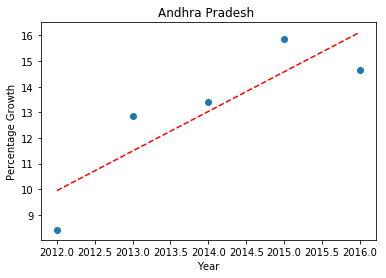

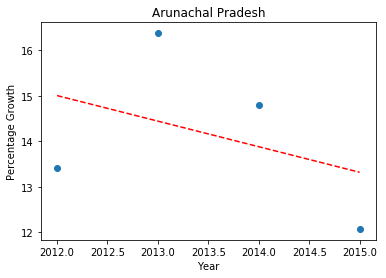

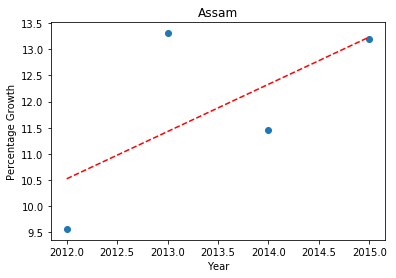

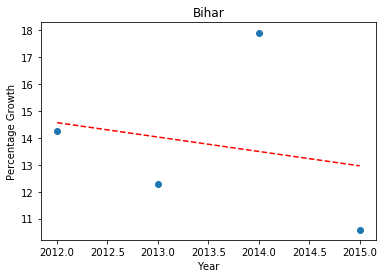

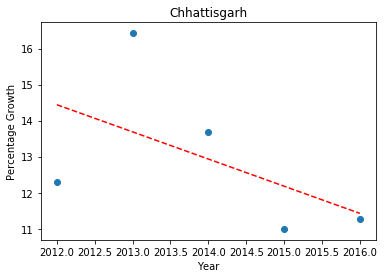

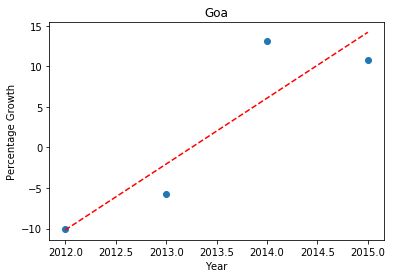

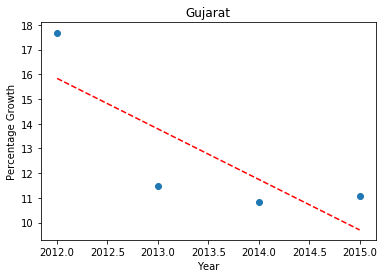

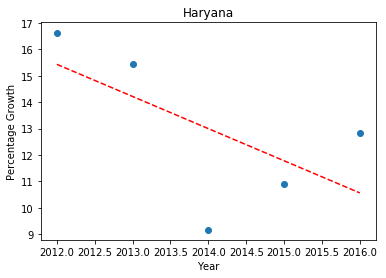

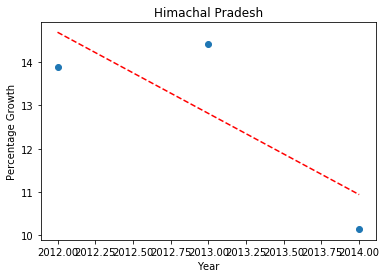

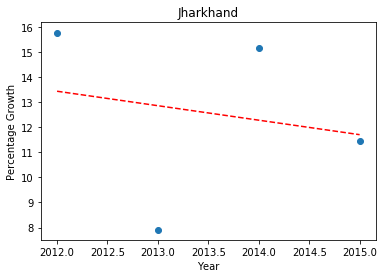

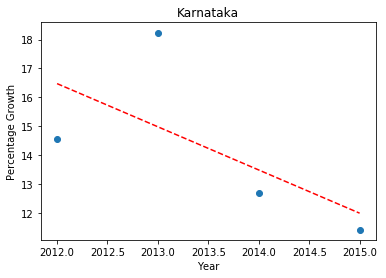

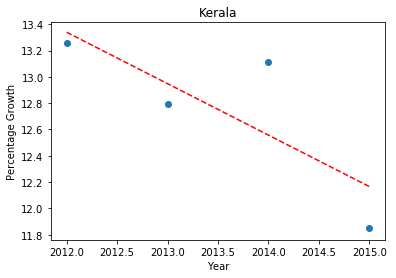

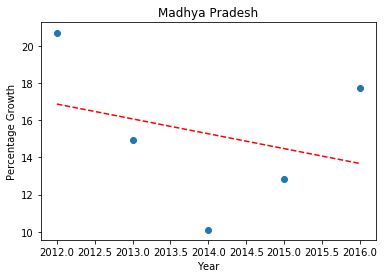

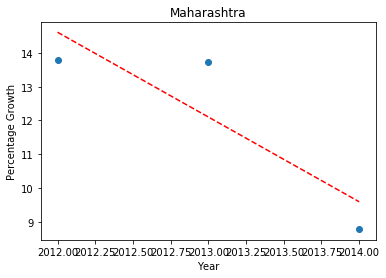

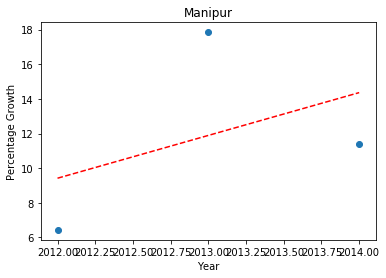

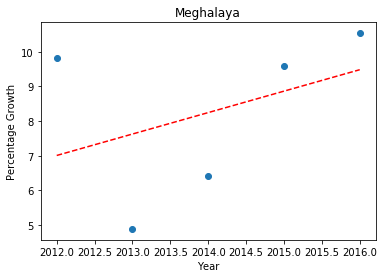

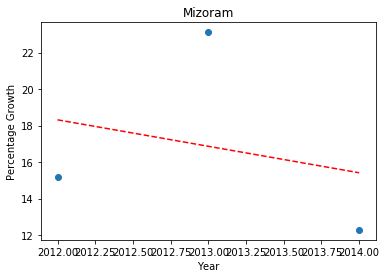

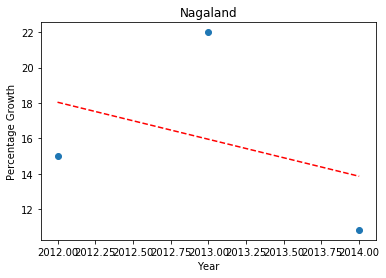

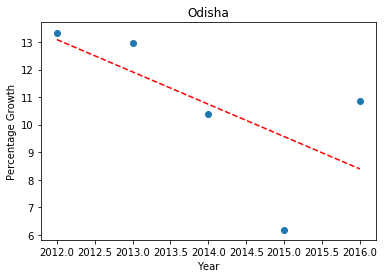

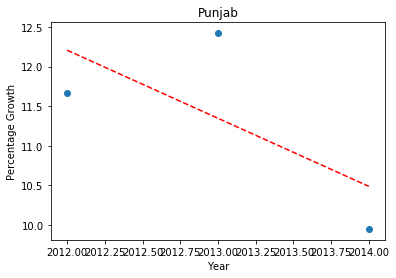

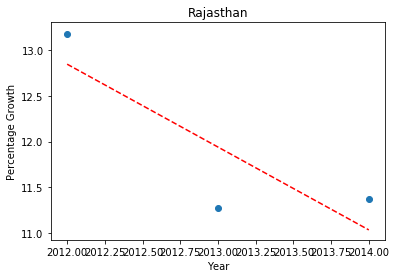

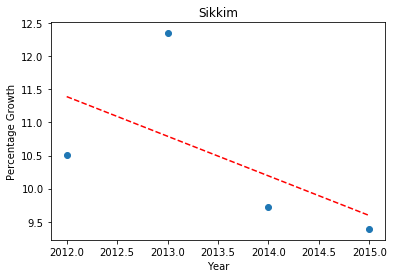

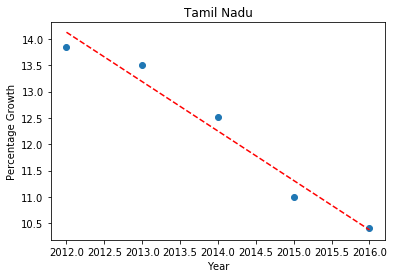

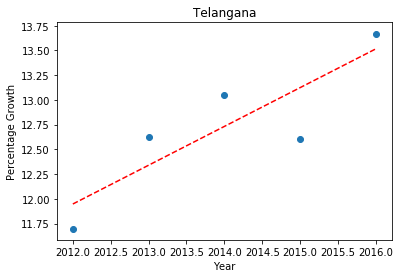

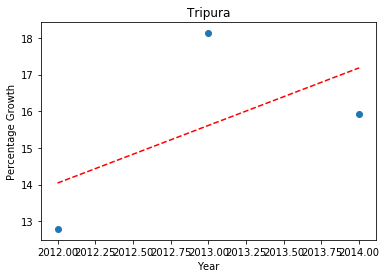

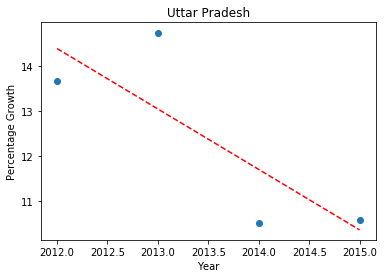

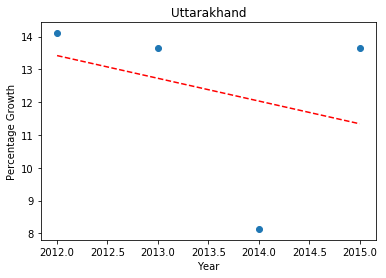

In [6]:
growth_df = gsdp_df[gsdp_df['Items  Description'].str.contains('Growth')]
exclude_list = ['Andaman & Nicobar Islands', 'Chandigarh', 'Delhi', 'Puducherry', 'Jammu & Kashmir', 'Items  Description', 'Duration', 'All_India GDP']
for col in growth_df:
  if col in exclude_list:
    continue
  plot_best_fit_line(growth_df, col)
  plt.show()

Best Fit Line graph of All India:

-0.7659999999998491

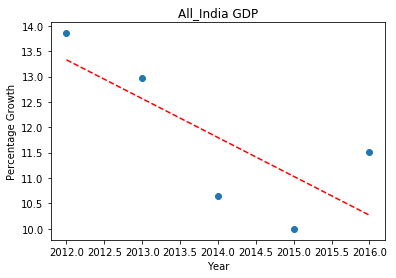

In [7]:
plot_best_fit_line(growth_df, 'All_India GDP')

**Comparing States**

Punjab:  -0.86
Haryana:  -1.22
Growth of Punjab is more than Haryana


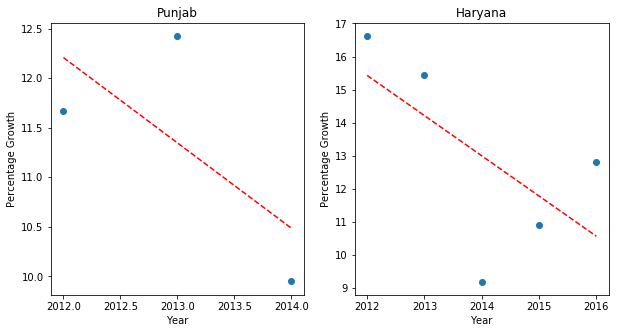

Uttar Pradesh:  -1.34
Andhra Pradesh :  1.54
Growth of Andhra Pradesh  is more than Uttar Pradesh


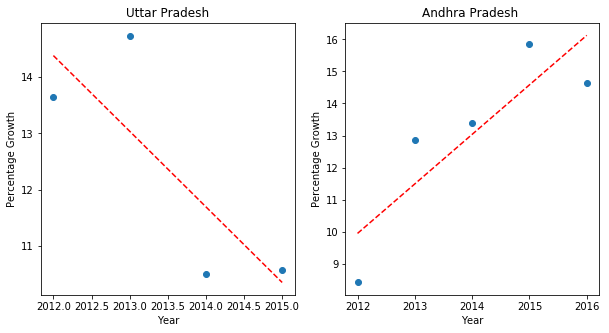

In [8]:
def compare_growth(s1, s2):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    g1 = plot_best_fit_line(growth_df, s1)
    plt.subplot(1,2,2)
    g2 = plot_best_fit_line(growth_df, s2)

    print(f'{s1}: ', round(g1, 2))
    print(f'{s2}: ', round(g2, 2))

    if(g1 > g2):
        print(f'Growth of {s1} is more than {s2}')
    elif(g1 < g2):
        print(f'Growth of {s2} is more than {s1}')
    else:
        print(f'Growth of {s1} and {s2} are same')
    plt.show()

compare_growth('Punjab', 'Haryana')
compare_growth('Uttar Pradesh', 'Andhra Pradesh ')


**Rank top 3 fastest and 3 slowest-growing states**

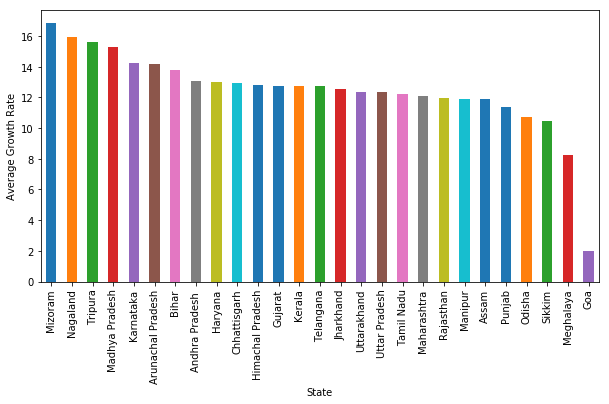

In [9]:
average_df = growth_df.loc[:, [x for x in gsdp_df.columns if x not in exclude_list]].mean().sort_values(ascending = False)
plt.ylabel('Average Growth Rate')
plt.xlabel('State')
average_df.plot.bar(figsize = (10,5))

Fastest Growing states:
- Mizoram
- Nagaland
- Tripura

Slowest Growing states:
- Goa
- Meghalaya
- Sikkim










**Nation's growth rate**

In [10]:
national_growth = growth_df.loc[:,'All_India GDP'].mean()
print(f"Nation's growth rate is: {round(national_growth, 2)} %")

Nation's growth rate is: 11.8 %


**Home State Growth Rate**

In [11]:
haryana_growth = growth_df.loc[:,'Haryana'].mean()
print(f"Haryana's growth rate is: {round(haryana_growth, 2)} %")

Haryana's growth rate is: 13.0 %


Haryana's Average Growth is more than National Average Growth

**Total GDP of the states for the year 2015-16**

Text(0, 0.5, 'Total GSDP for year 2015-16')

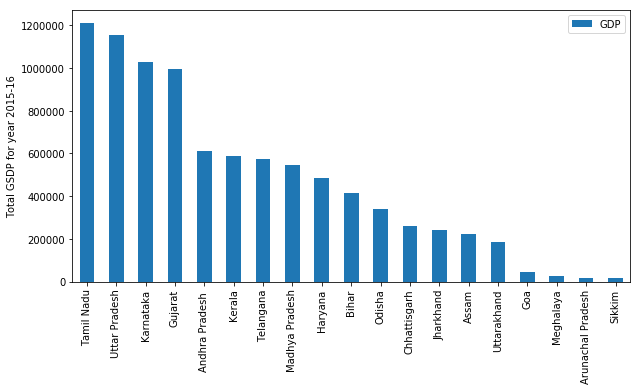

In [12]:
current_gdp_df = gsdp_df[gsdp_df['Items  Description'].str.contains('CURRENT')]
#current_gdp_df.set_index('Duration', inplace = True)
#print(current_gdp_df)
state_df = current_gdp_df[current_gdp_df['Duration'] == 2015].loc[:,[x for x in current_gdp_df.columns if x not in exclude_list]]
state_df = state_df.transpose()
state_df.columns = ['GDP']
state_df.dropna(inplace = True)
state_df.sort_values(ascending = False, axis = 0, by='GDP', inplace= True)
state_df.plot.bar(figsize = (10,5))
plt.ylabel('Total GSDP for year 2015-16')

Top 5 States:
- Tamil Nadu
- Uttar Pradesh
- Karnataka
- Gujarat
- Andhra Pradesh

Bottom 5 States:
- Uttarakhand
- Goa
- Meghalya
- Arunachal Pradesh
- Sikkim

**Insights**

- All the states with low GDP are smaller states


<h2>Part B</h2>

In [13]:
import glob

In [14]:
all_files = glob.glob(r'datasets/Data-1-B/*.csv')

In [15]:
df_list = []
for file in all_files:
    state_df = pd.read_csv(file, encoding = 'ISO-8859-1')
    state_df = state_df.loc[:,['Item', '2014-15']].transpose()
    #strip('*') to remove trailing * from the items present in some datasets like Kerala
    headers = state_df.iloc[0].str.strip('*')
    state_df = state_df.iloc[1:]
    state_df.columns= headers
    state_df['State'] = file.split('-')[-3].replace('_', ' ')
    df_list.append(state_df)
    
all_state_df = pd.concat(df_list, ignore_index = True, sort = False)

**Filter out the union territories**

In [16]:
all_state_df = all_state_df.loc[~all_state_df['State'].isin(exclude_list)]

**Plot the GDP per capita for all the states**

Text(0, 0.5, 'Per Capita GSDP (Rs.)')

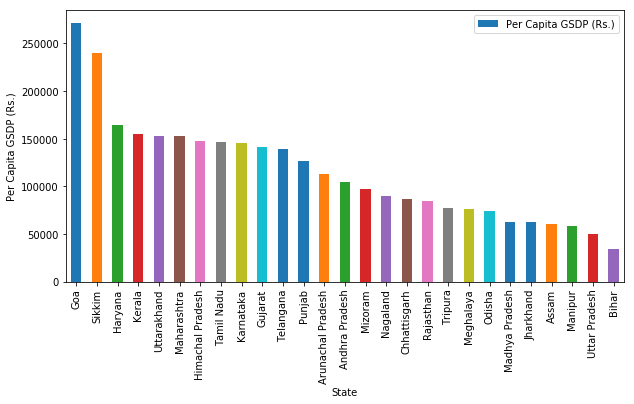

In [17]:
per_capita_df = all_state_df.loc[:,['State', 'Per Capita GSDP (Rs.)']]
per_capita_df.sort_values(by = 'Per Capita GSDP (Rs.)', axis=0, ascending = False, inplace = True)
per_capita_df.plot.bar(x = 'State', y = 'Per Capita GSDP (Rs.)', figsize = (10,5))
plt.ylabel('Per Capita GSDP (Rs.)')

Top 5 states based on the GDP per capita:
<ol>
    <li>Goa</li>
    <li>Sikkim</li>
    <li>Haryana</li>
    <li>Karala</li>
    <li>Uttarakhand</li>
</ol>

Bottom 5 states based on the GDP per capita
<ol>
    <li>Bihar</li>
    <li>Uttar Pradesh</li>
    <li>Manipur</li>
    <li>Assam</li>
    <li>Jharkhand</li>
</ol>

In [18]:
ratio = per_capita_df.iloc[0][1]/per_capita_df.iloc[-1][1]
print(f'Ratio of the highest per capita GDP to the lowest per capita GDP is {round(ratio,3)}.')

Ratio of the highest per capita GDP to the lowest per capita GDP is 8.005.


In [19]:
def get_percentage_column(col):
    return 100 * all_state_df[col] / all_state_df['Gross State Domestic Product']

all_state_df['Primary Percentage'] = get_percentage_column('Primary')
all_state_df['Secondary Percentage'] = get_percentage_column('Secondary')
all_state_df['Tertiary Percentage'] = get_percentage_column('Tertiary')

Text(0, 0.5, 'Contribution Percentage')

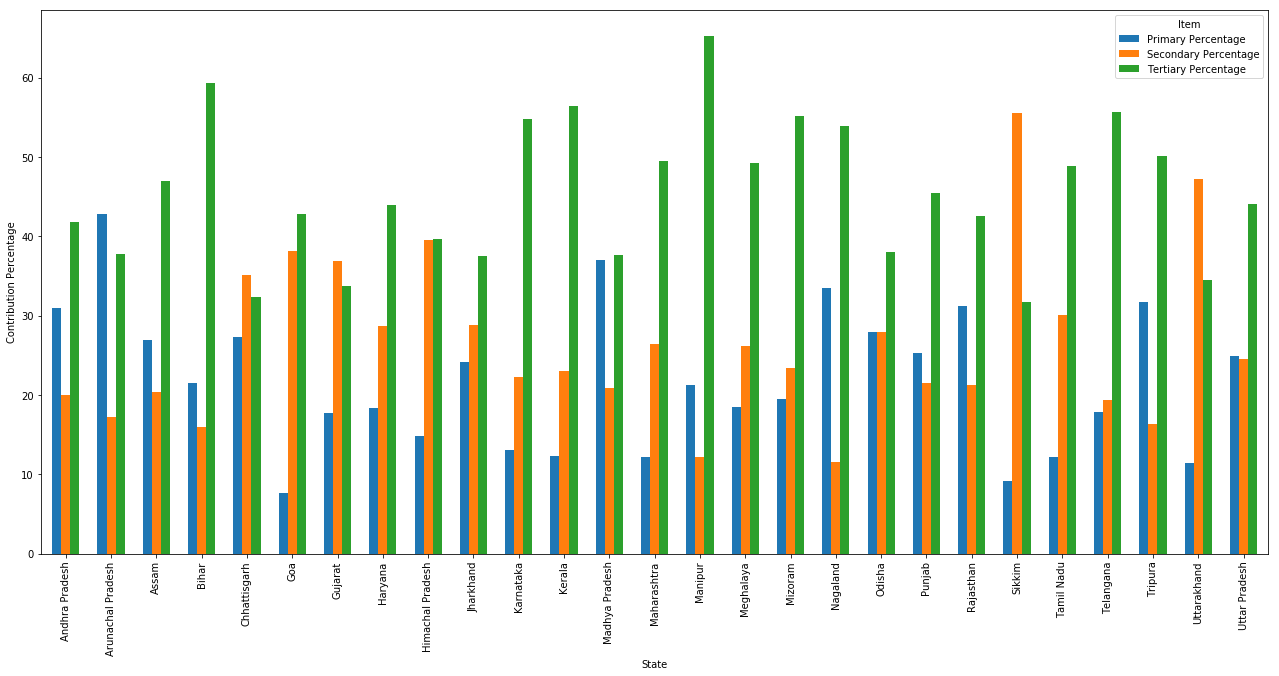

In [20]:
all_state_df.plot.bar(x = 'State', y = ['Primary Percentage', 'Secondary Percentage', 'Tertiary Percentage' ], figsize=(22,10), width = 0.6)
plt.ylabel('Contribution Percentage')

We Will Use the Grouped Bar chart here because with this we can easily compare sectors with in a state and can also compare easily compare the same sector of different states

Primary + Secondary + Tertiary is not equal to  total GDP because the total GDP also includes the Taxes on Products and excludes the Subsidies on products.

        Total GDP = Primary + Secondary + Tertiary + Taxes on Products - Subsidies on products

**Insights:**
    <ul>
    <li>For mostly all of the states Tertiary sector the major contributor</li>
    </ul>

In [21]:
all_state_df['Percentile'] = all_state_df['Per Capita GSDP (Rs.)'].rank(pct = True)*100

In [22]:
correlation = all_state_df['Percentile'].astype('float64').corr(all_state_df['Primary Percentage'].astype('float64'))
print(f'Correlation is : {round(correlation, 5)}')

Correlation is : -0.62002


**Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4)**

In [23]:
def find_category(value):
    if value < 20:
        return 'C4'
    if value < 50:
        return 'C3'
    if value < 85:
        return 'C2'
    return 'C1'
all_state_df['Category'] = all_state_df['Percentile'].apply(find_category)

In [24]:
subsector_list = ['Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 
                 'Electricity, gas, water supply & other utility services', 'Construction', 
                 'Trade, repair, hotels and restaurants', 
                 'Transport, storage, communication & services related to broadcasting','Financial services',
                 'Real estate, ownership of dwelling & professional services', 'Public administration', 
                 'Other services']

In [25]:
category_group_df = all_state_df.groupby('Category')
keys = category_group_df.groups.keys()
grouped_agg_df = pd.DataFrame()
grouped_agg_df['Category'] = keys
grouped_agg_df['TOTAL GSVA at basic prices'] = [category_group_df.get_group(k).loc[:,'TOTAL GSVA at basic prices'].sum() for k in keys]
for i in subsector_list:
    grouped_agg_df[i] = [category_group_df.get_group(k).loc[:,i].sum() for k in keys]
    grouped_agg_df[i] =  100 * (grouped_agg_df[i] / grouped_agg_df['TOTAL GSVA at basic prices'])
    
grouped_agg_df.drop('TOTAL GSVA at basic prices', axis=1, inplace = True)

In [26]:
def plot_80_contributers(category, index):
    sorted_df = grouped_agg_df.loc[grouped_agg_df['Category'] == category, grouped_agg_df.columns != 'Category'].sort_values(by=index,ascending=False, axis=1)
    i = 0
    sum = 0
    while(sum < 78):
        sum = sum + float(sorted_df.iloc[:,i])
        i = i + 1
    plt.figure(figsize=(14,6))
    sorted_df.loc[:,:sorted_df.columns[i]].plot.bar(figsize=(18,5))
    plt.ylabel('Percentage')
    plt.xlabel(f'Sub-Sectors of {category}')
    plt.title(f'Top Sub Sectors That Contributed 80% (approx) of the {category} category GSDP')
    plt.show()

<Figure size 1008x432 with 0 Axes>

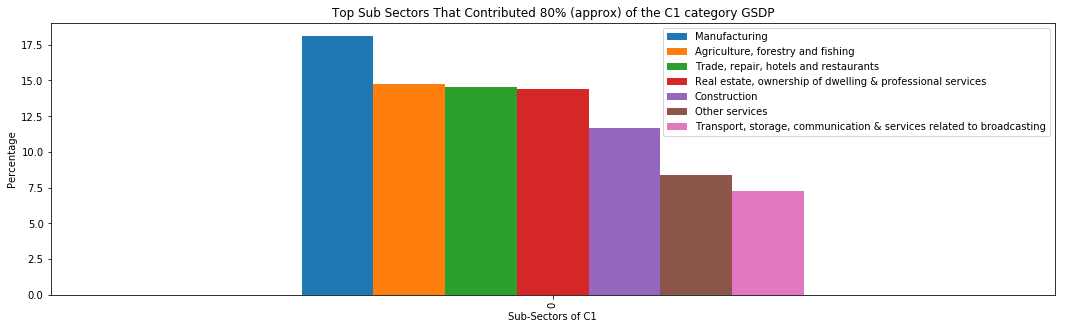

<Figure size 1008x432 with 0 Axes>

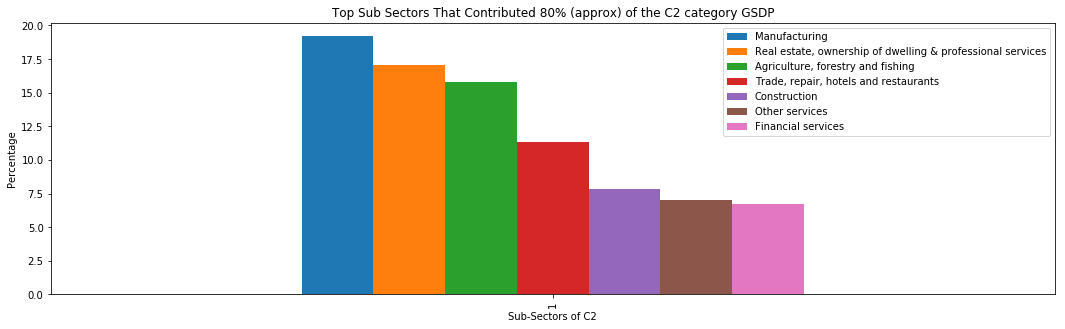

<Figure size 1008x432 with 0 Axes>

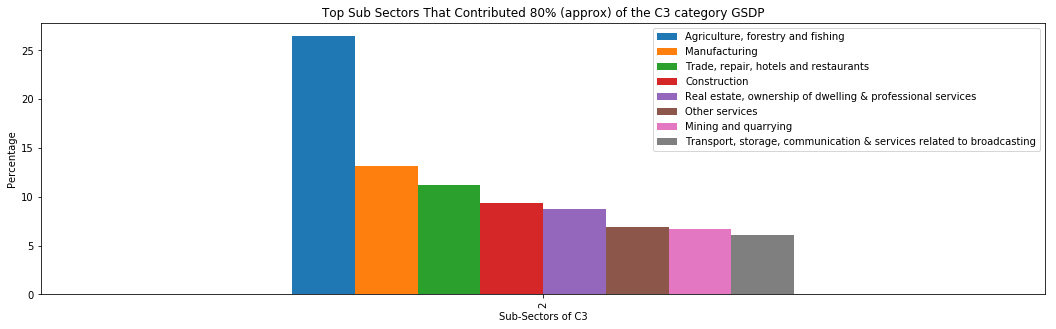

<Figure size 1008x432 with 0 Axes>

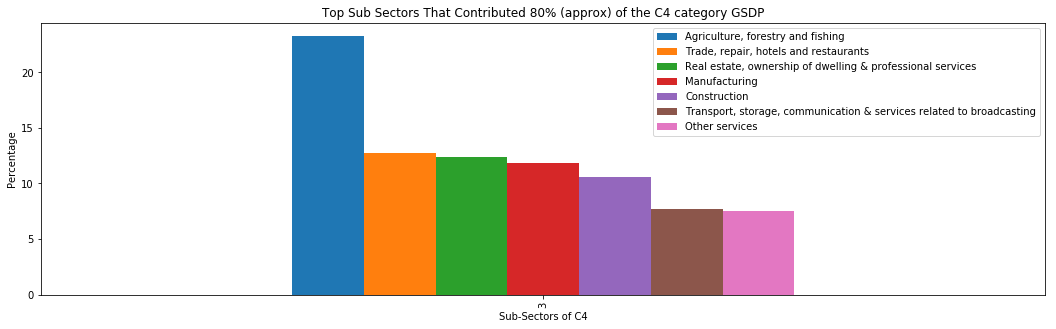

In [27]:
plot_80_contributers('C1', 0)
plot_80_contributers('C2', 1)
plot_80_contributers('C3', 2)
plot_80_contributers('C4', 3)

- For Top States Manufacturing is the main contributor whereas for bottom states agriculture  is the main contributor
- Manufacturing seem to be correlated with high GDP
         Subsector      Focus Area
             C1           Transport
             C2           Financial Service
             C3           Transport
             C4           Other Services

Recommendation:
C1 : Improve Transport and other service
C2: Improve Other and Final services
C3: Sector difference is very high so try to neutralize that and improve transport
C4: Sector difference is very high so try to neutralize that and improve Other services


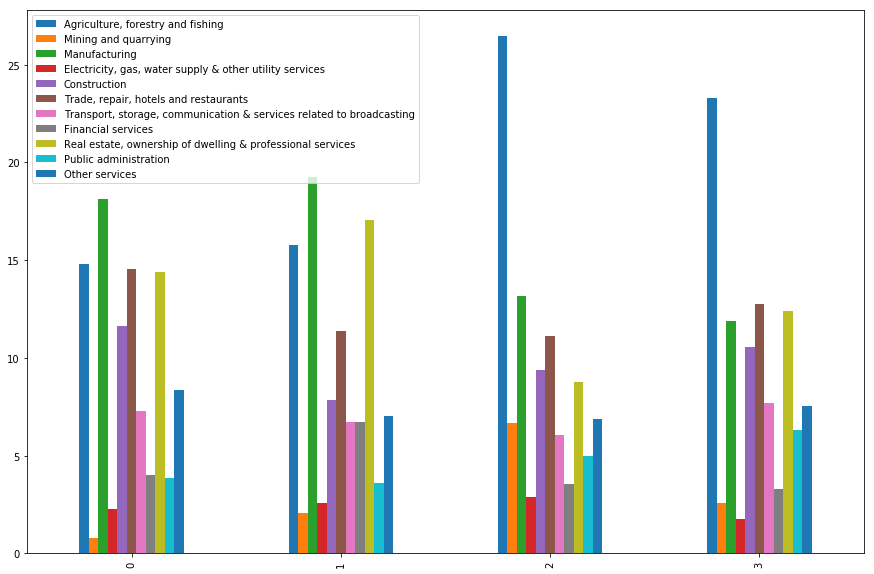

In [40]:
grouped_agg_df.plot.bar(figsize= (15, 10))

<h2>Part-II: GDP and Education Dropout Rates</h2>

In [28]:
dropout_df = pd.read_csv('datasets/dropout_data.csv', encoding = 'ISO-8859-1')

In [29]:
required_dropout_columns = ['Level of Education - State', 'Primary - 2014-2015.1', 'Upper Primary - 2014-2015',
                            'Secondary - 2014-2015', 'Senior Secondary - 2014-2015']
dropout_df = dropout_df.loc[:, required_dropout_columns]
dropout_df['Primary - 2014-2015'] = dropout_df['Primary - 2014-2015.1']
dropout_df['State'] = dropout_df['Level of Education - State']
dropout_df.drop(['Primary - 2014-2015.1', 'Level of Education - State'], axis = 1, inplace = True)
dropout_df = dropout_df.loc[~dropout_df['State'].isin(exclude_list)]

Fix name of Chhattisgarh and Uttarakhand in Dropouts dataframe because that will cause issue in merge


In [30]:
dropout_df.replace('Chhatisgarh', 'Chhattisgarh', inplace = True)
dropout_df.replace('Uttrakhand', 'Uttarakhand', inplace = True)

In [31]:
merged_state_dropout_df = pd.merge(all_state_df, dropout_df, on = 'State', how = 'left')

In [32]:
def plot_dropout_comparison(col):
    merged_state_dropout_df.sort_values(axis = 0, by = col, ascending = False, inplace = True)
    fig, ax = plt.subplots()
    ax3 = ax.twinx()
    rspine = ax3.spines['right']
    rspine.set_position(('axes', 1.15))
    ax3.set_frame_on(True)
    ax3.patch.set_visible(False)
    fig.subplots_adjust(right=0.7)
    merged_state_dropout_df.plot.line(ax=ax, x = 'State', y= col, style='--r', figsize=(22,10))
    merged_state_dropout_df.plot.line(ax=ax3, x = 'State', y= 'Primary - 2014-2015', style='b')
    merged_state_dropout_df.plot.line(ax=ax3, x = 'State', y= 'Upper Primary - 2014-2015', style='g')
    merged_state_dropout_df.plot.line(ax=ax3, x = 'State', y= 'Secondary - 2014-2015', style='y')
    merged_state_dropout_df.plot.line(ax=ax3, x = 'State', y= 'Senior Secondary - 2014-2015', style='purple')

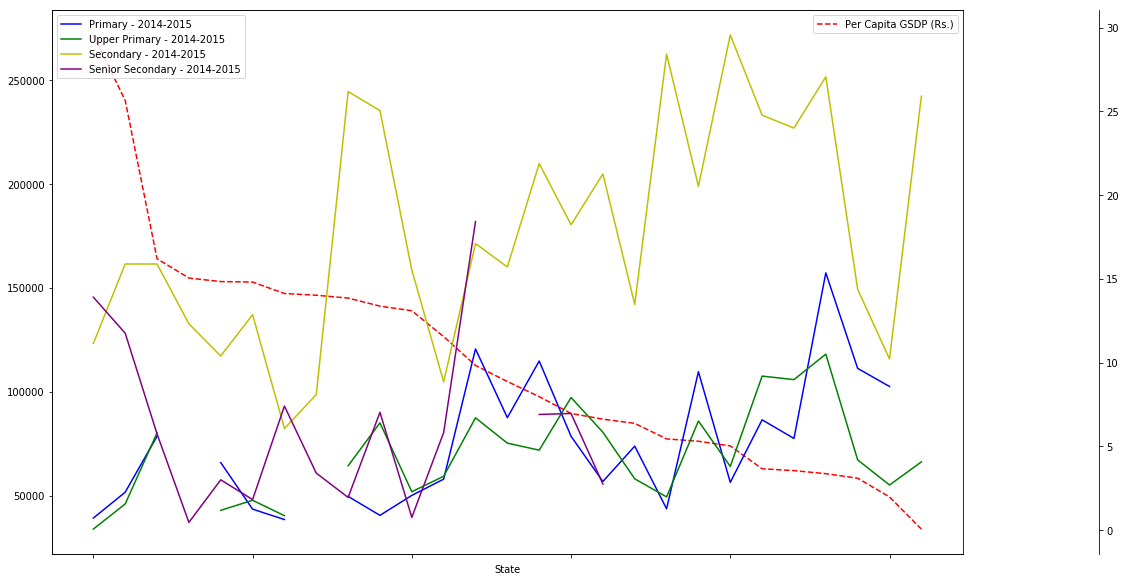

In [33]:
plot_dropout_comparison('Per Capita GSDP (Rs.)')

You can see as the Per Capita GDP decreases 
- The dropout rate in secondary education level increases very much (High Correlation)
- For senior secondary level there is slight decreasing trend but there seems very low correlation
- For Primary and Upper Primary level there is increases in dropout by small amount

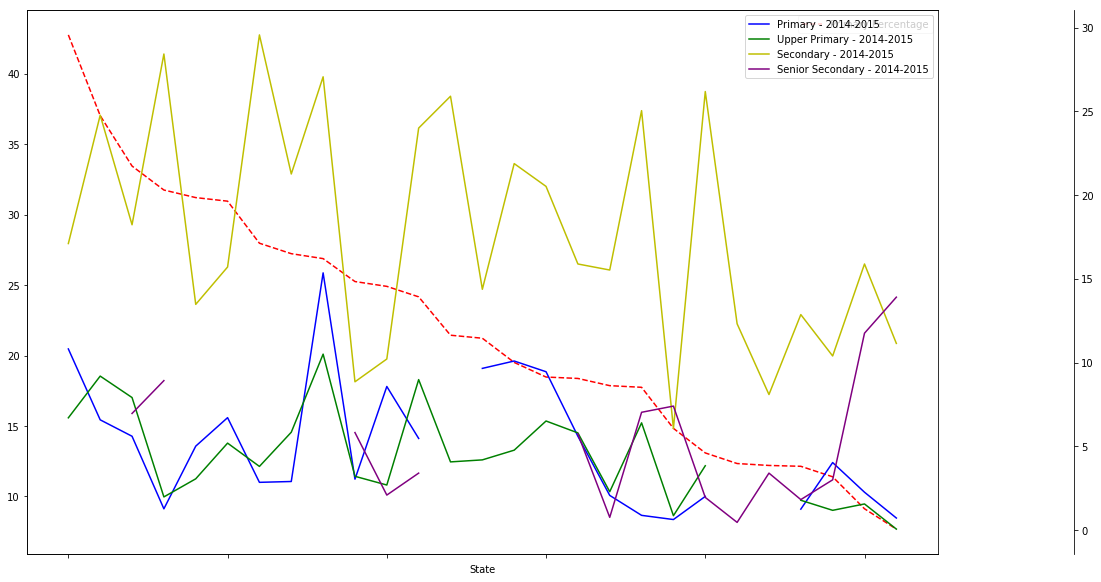

In [34]:
plot_dropout_comparison('Primary Percentage')

As Primary sector percentage increases, Senior secondary dropout increases 

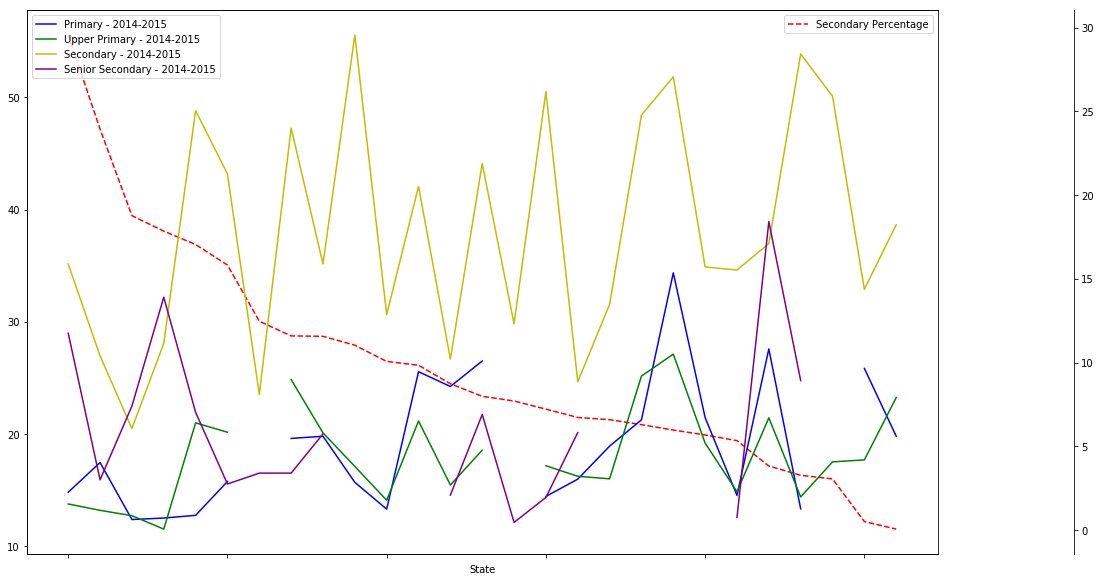

In [35]:
plot_dropout_comparison('Secondary Percentage')

As Secondary sector percentage decreases, Senior secondary dropout increases 

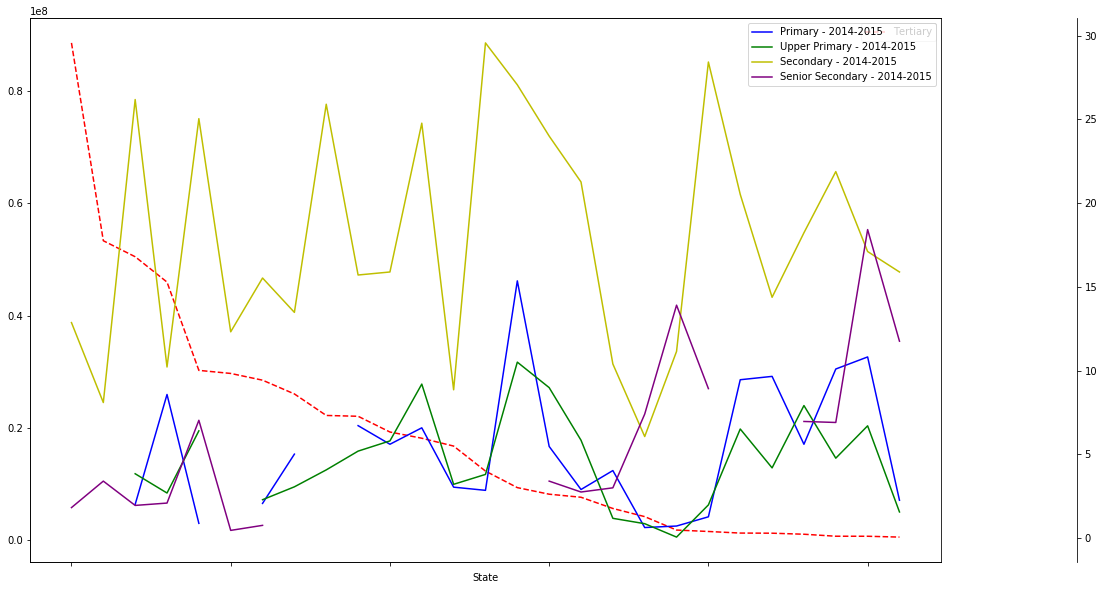

In [36]:
plot_dropout_comparison('Tertiary')

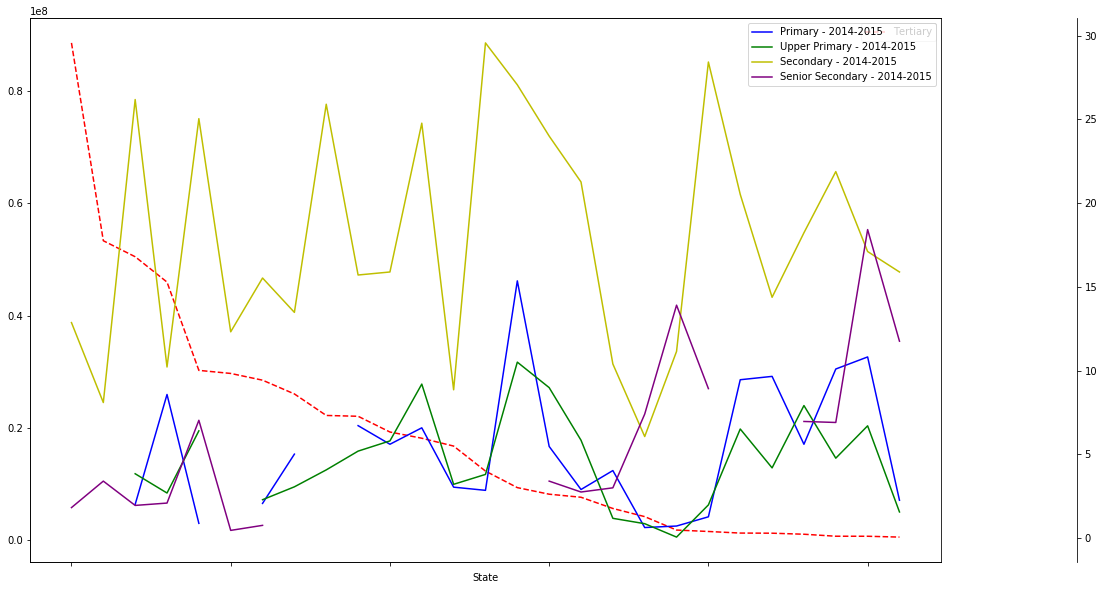

In [37]:
plot_dropout_comparison('Tertiary')

As Tertiary sector percentage decreases, Senior secondary dropout increases 

Insight: Secondary and Tertiary required educated people

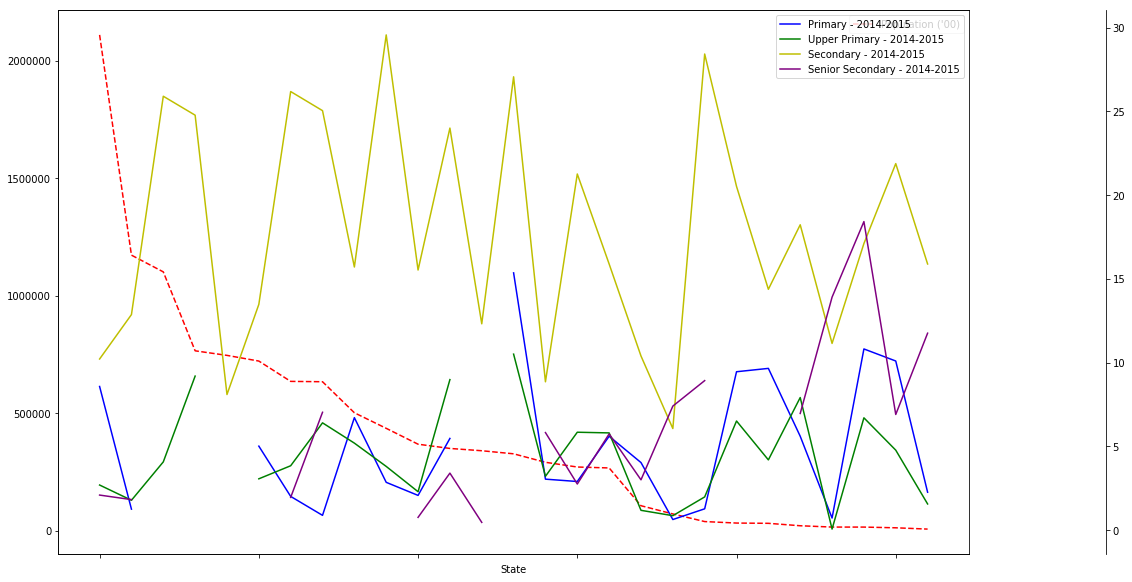

In [38]:
plot_dropout_comparison("Population ('00)")

- Expected High Correaltion between them
- Observed: No/little correlation


Hypothesis: 
 
- There is a steady increase in GSDP by the decrease in the dropout rate
- The states where agriculture is major contributor have high  senior secondary drop rate and for manufacturing reverse is true
